In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/height/heights.csv


In [3]:
df = pd.read_csv('/kaggle/input/height/heights.csv')

In [4]:
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [5]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

In [7]:
df.isnull().mean()*100

gender    0.0
height    0.0
dtype: float64

In [9]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='height', ylabel='Count'>

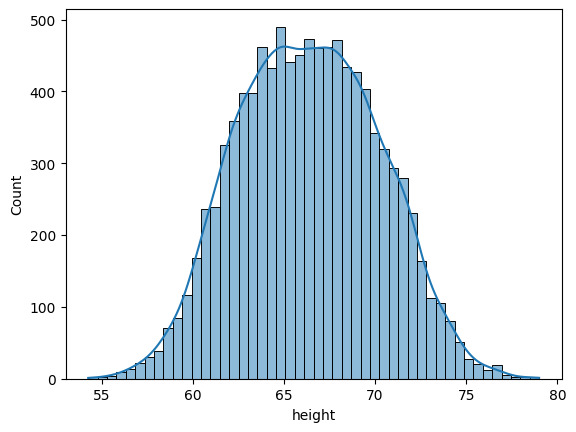

In [10]:
sns.histplot(df.height,kde=True)

In [11]:
mean = df.height.mean()

In [12]:
mean

66.367559754866

In [16]:
std_deviation = df.height.std()
print(std_deviation)

3.847528120795573


In [17]:
mean - 3*std_deviation

54.824975392479274

In [18]:
mean + 3*std_deviation

77.91014411725271

In [21]:
df[(df.height<54.82) | (df.height > 77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [22]:
df_no_outlier = df[(df.height<77.91) & (df.height>54.82)]

In [24]:
df_no_outlier.shape

(9993, 2)

In [39]:
df['Z_score'] = (df.height - df.height.mean()) / df.height.std()

In [43]:
df['Z_score']

0       1.943964
1       0.627505
2       2.012343
3       1.393991
4       0.913375
          ...   
9995   -0.050658
9996    0.181830
9997   -0.649655
9998    0.693090
9999   -1.149651
Name: Z_score, Length: 10000, dtype: float64

In [32]:
Z_score = (68.781904 - mean ) / std_deviation

In [53]:
df[(df.Z_score<-3) | (df.Z_score>3)]

,gender,height,Z_score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [56]:
percentile1 = df['height'].quantile(0.001)

In [57]:
percentile99 = df['height'].quantile(0.999)

In [58]:
percentile1

56.066548911530006

In [59]:
percentile99

77.06738853708

In [60]:
iqr = percentile99 - percentile1

In [61]:
iqr

21.00083962555

In [62]:
upper_limit = percentile99 + 1.5*iqr
lower_limit = percentile1 - 1.5*iqr

In [63]:
upper_limit

108.56864797540501

In [64]:
lower_limit

24.565289473205006

In [65]:
df[df['height'] > upper_limit]

,gender,height,Z_score


In [67]:
df[df['height'] < lower_limit]

,gender,height,Z_score


In [68]:
std_deviation = df.height.std()
print(std_deviation)

3.847528120795573


In [70]:
lower_bound = mean - 4 * std_deviation
upper_bound = mean + 4 * std_deviation


In [71]:
lower_bound

50.9774472716837

In [72]:
upper_bound

81.75767223804829

In [73]:
import matplotlib.pyplot as plt

<Figure size 720x350 with 0 Axes>

<Figure size 720x350 with 0 Axes>

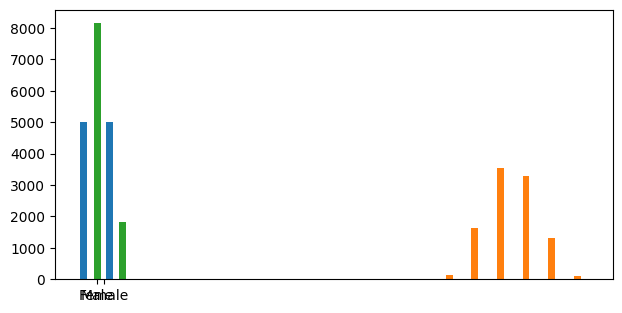

In [77]:
plt.figure(figsize=(7.2, 3.5))
plt.hist(df, bins=20)
plt.xlabel
plt.ylabel
plt.show()